# Zero Shot Learning YOLO V8

This notebook purpose is to try the object detection utilizing one-shot learning yolo v8


0: 384x640 2 persons, 1 bottle, 3 cups, 1 chair, 80.1ms
Speed: 1.6ms preprocess, 80.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.91
Class name --> person
Confidence ---> 0.91
Class name --> person
Confidence ---> 0.84
Class name --> cup
Confidence ---> 0.56
Class name --> cup
Confidence ---> 0.49
Class name --> chair
Confidence ---> 0.46
Class name --> cup
Confidence ---> 0.3
Class name --> bottle


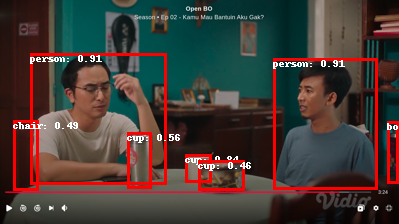

In [27]:
from ultralytics import YOLO
import cv2
import math 
from PIL import Image
from PIL import ImageDraw

# model
model = YOLO("yolo-Weights/yolov8n.pt")

# object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

img = Image.open('eating.png')
width, height = img.size
img = img.resize((width//4, height//4))
predictions = model(img, stream=False)

draw = ImageDraw.Draw(img)

for r in predictions:
    boxes = r.boxes
    for box in boxes:
        # bounding box
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

        # put box in cam
        draw.rectangle((x1, y1, x2, y2), outline="red", width=3)

        # confidence
        confidence = math.ceil((box.conf[0]*100))/100
        print("Confidence --->",confidence)

        # class name
        cls = int(box.cls[0])
        print("Class name -->", classNames[cls])

        # object details
        draw.text((x1, y1), f"{classNames[cls]}: {round(confidence,2)}", fill="white")

img